# INtroduction

In [ ]:
In the healthcare industry,insurance claim are submitted by hospitals and healthcare provider 
to insurance companies for remburement of medical expenses, claim  denial cause financial strain
on both healthcare provider and patients leading to increasing administrative coast and delayed 

# Objective 

# BUssinss impact

In [ ]:
1. Reduce claim denial by identifying potential issues befor submission
2. improve claim approval rate
3. minimize financial for healthcare provider and insurance companies

# data description

In [ ]:
the data set contain historical claim records with various feature

# import libraries

In [120]:
# To read data and to operation
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# split
from sklearn.model_selection import train_test_split, GridSearchCV

# object to numerical
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# metric to evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# to convert if files
import pickle
import json

# to ignor warnings
import warnings
warnings.filterwarnings('ignore')

In [121]:
df = pd.read_csv("healthcare_claims_large.csv")
df.head(3)
df.tail(4)

,Claim_ID,Patient_Age,Gender,Provider,Diagnosis,Procedure,Claim_Amount,Hospital_Charges,State,Policy_Type,Claim_Status
4996,C04997,79,Female,P001,D002,PR003,10670,61376,AP,Basic,Approved
4997,C04998,57,Male,P005,D005,PR005,7897,85144,DL,Premium,Approved
4998,C04999,71,Female,P005,D003,PR005,40140,89365,WB,Basic,Approved
4999,C05000,24,Female,P001,D003,PR002,30583,84016,WB,Standard,Approved


# step 3. Exploratary data analysis(EDA)

In [122]:
# check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Claim_ID          5000 non-null   object
 1   Patient_Age       5000 non-null   int64 
 2   Gender            5000 non-null   object
 3   Provider          5000 non-null   object
 4   Diagnosis         5000 non-null   object
 5   Procedure         5000 non-null   object
 6   Claim_Amount      5000 non-null   int64 
 7   Hospital_Charges  5000 non-null   int64 
 8   State             5000 non-null   object
 9   Policy_Type       5000 non-null   object
 10  Claim_Status      5000 non-null   object
dtypes: int64(3), object(8)
memory usage: 429.8+ KB


In [ ]:
# summary statistics 
df.describe()
"""age:
       1. mean - 53
       2. min  - 18 
       3. max  - 89
       
"""

In [123]:
# count of missing values
df.isnull().sum()

Claim_ID            0
Patient_Age         0
Gender              0
Provider            0
Diagnosis           0
Procedure           0
Claim_Amount        0
Hospital_Charges    0
State               0
Policy_Type         0
Claim_Status        0
dtype: int64

In [124]:
# check duplicate entires (raws)
df.duplicated().sum()

# drop duplicate

df.drop_duplicates(inplace = True)

In [125]:
df.columns

Index(['Claim_ID', 'Patient_Age', 'Gender', 'Provider', 'Diagnosis',
       'Procedure', 'Claim_Amount', 'Hospital_Charges', 'State', 'Policy_Type',
       'Claim_Status'],
      dtype='object')

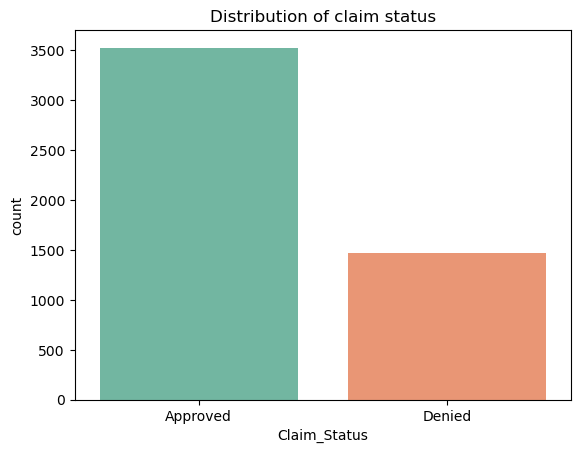

In [126]:
#check target variable distribution
# classification problems means target in categorical var (countplot)
"""base on this visulization we understand our data is imbalance
1. we want to balance this data set """

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = df['Claim_Status'],palette = "Set2")
plt.title("Distribution of claim status")
plt.show()


# features distribution

In [ ]:
# features dustribution
# plot on only continues columns
df.hist(figsize = (12,8),bins= 30)
plt.show()

In [ ]:
# Boxplot for outlier detection
sns.boxplot(data = df)
plt.show()

In [ ]:
# correlation heatmap
# FOR CORRELATION MATRIX WE WANT COLUMN IS NUMERIC

In [ ]:
df.head(4)

In [ ]:
# pair plot for raltional analysis
# with target columns ()
# hue - we plot base on target column

sns.pairplot(df,hue = "Claim_Status",diag_kind = "kde" )
plt.show()

In [28]:
# check skewness
#df.skew()

# step4 . features engineering

In [ ]:
df.head(1)

In [ ]:
df['Provider'].value_counts()  # AP - 10, TN - 9
df['Diagnosis'].value_counts()
df['Procedure'].value_counts()
df['State'].value_counts()

In [127]:
# Encode categorical variable
# first we convert only Labels data
from sklearn.preprocessing import LabelEncoder

# syntax 
# var = le.fit_transform(df[columns])
le = LabelEncoder()

categorical_columns = ["Provider",'Diagnosis',"Procedure","State"]


for i in categorical_columns:
    df[i] = le.fit_transform(df[i])

In [ ]:
df.head()

In [ ]:
# convert Target and gender to binary
df['Gender'].value_counts()
df["Claim_Status"].value_counts()

In [128]:
# convert Target and gender to binary
df["Claim_Status"] = df["Claim_Status"].replace({'Approved':1,'Denied':0})

# convert gender columns
df["Gender"] = df["Gender"].replace({'Male':1,'Female':0})

In [ ]:
df.head(1)

In [129]:
#df["Policy_Type"].value_counts()

# also convert policy type columns
df["Policy_Type"] = le.fit_transform(df["Policy_Type"])

In [ ]:
df.info()

# Why drop claim_id

In [ ]:
It does not contribute to predict claim denial keeping it may add noise 
to the model
machine learning models do not need unique identifier

In [130]:
df.drop("Claim_ID",axis = 1,inplace = True)

In [131]:
df.head(1)

,Patient_Age,Gender,Provider,Diagnosis,Procedure,Claim_Amount,Hospital_Charges,State,Policy_Type,Claim_Status
0,72,1,2,1,2,30785,3732,6,0,1


In [132]:
# standardize Numerical feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_feature = ["Patient_Age","Claim_Amount","Hospital_Charges"]
df[numeric_feature] = scaler.fit_transform(df[numeric_feature])

In [133]:
df.head(1)

,Patient_Age,Gender,Provider,Diagnosis,Procedure,Claim_Amount,Hospital_Charges,State,Policy_Type,Claim_Status
0,0.901239,1,2,1,2,0.401964,-1.64671,6,0,1


# our data is imbalance so we applying smote technique to balance our data

In [ ]:
1. random oversampling
2. random undersampling
3. smote (synthetic minority oversampling technique)

In [134]:
from imblearn.over_sampling import SMOTE

In [135]:
# seperates feature and target

x = df.drop("Claim_Status",axis = 1)
y = df['Claim_Status']

In [136]:
# apply smote to balance classes

smote = SMOTE()
x_resampled,y_resampled = smote.fit_resample(x,y)

# convert in datafram

In [137]:
df1 = pd.DataFrame(x_resampled, columns = x.columns)
df1['target'] = y_resampled

In [138]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7056 entries, 0 to 7055
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Patient_Age       7056 non-null   float64
 1   Gender            7056 non-null   int64  
 2   Provider          7056 non-null   int32  
 3   Diagnosis         7056 non-null   int32  
 4   Procedure         7056 non-null   int32  
 5   Claim_Amount      7056 non-null   float64
 6   Hospital_Charges  7056 non-null   float64
 7   State             7056 non-null   int32  
 8   Policy_Type       7056 non-null   int32  
 9   target            7056 non-null   int64  
dtypes: float64(3), int32(5), int64(2)
memory usage: 413.6 KB


# check target variable distribution after balance

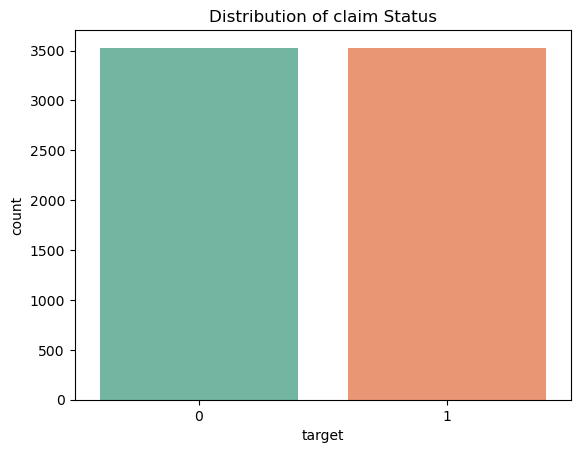

In [139]:
sns.countplot(x= df1['target'],palette = "Set2")
plt.title("Distribution of claim Status")
plt.show()

In [ ]:
# 1. classification or regression
# 2. high dimention(more columns) svm, naive bayes
# 3. low dimention(logistic,random,knn,decision)

# step6 split data for training and testing

In [171]:
# df1

x = df1.drop("target",axis = 1)
y = df1["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [110]:
x_train

,Patient_Age,Gender,Provider,Diagnosis,Procedure,Claim_Amount,Hospital_Charges,State,Policy_Type
5981,41,0,0,2,1,30827,74368,0,0
4222,35,0,0,2,3,42814,20225,7,2
1729,69,1,4,1,4,38030,10013,3,0
3907,79,0,4,0,2,13265,73736,7,1
4209,48,1,0,1,1,33127,80910,9,2
...,...,...,...,...,...,...,...,...,...
3772,38,0,1,0,4,38317,18677,7,1
5191,61,0,3,2,2,31101,21116,1,2
5226,62,0,0,0,1,44419,59431,1,0
5390,40,1,1,1,3,19347,74545,5,0


# step7 : train multiple ml model

In [141]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [142]:
# evalue on testing data
y_pred_test = log_model.predict(x_test)
accuracy_test = accuracy_score(y_pred_test,y_test)
print(f"accuracy of testing data :",accuracy_test)

# evaluation of training dataset
y_pred_train = log_model.predict(x_train)

accuracy_train = accuracy_score(y_pred_train,y_train)
print(f"accuracy of training data :",accuracy_train)

accuracy of testing data : 0.5354107648725213
accuracy of training data : 0.5467753366406803


###### random forest

In [143]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [144]:
# evalue on testing data
y_pred_test = rf_model.predict(x_test)
accuracy_test = accuracy_score(y_pred_test,y_test)
print(f"accuracy of testing data :",accuracy_test)

# evaluation of training dataset
y_pred_train = rf_model.predict(x_train)

accuracy_train = accuracy_score(y_pred_train,y_train)
print(f"accuracy of training data :",accuracy_train)

accuracy of testing data : 0.7287535410764873
accuracy of training data : 1.0


In [ ]:
# by using random forest model we get best accuracy but
# our model is overfitted
# overfitted - best accuracy on tarining data
               # bad accuracy on testin data

accuracy of testing data : 0.6784702549575071
accuracy of training data : 1.0

# step8: Hyperparametere tunning (GridSearchCv)

In [149]:
from sklearn.model_selection import RandomizedSearchCV

In [153]:
rf_model = RandomForestClassifier()

para = {"criterion":['gini','entropy'],
    'max_depth':np.arange(3,20),
    "min_samples_split":np.arange(3,20)
    "min_samples_leaf":np.arange(2,10),
    "n_estimators":np.arange(50,150)}

random_search = RandomizedSearchCV(rf_model, para, cv = 5)
random_search.fit(x_train, y_train)
best_model = random_search.best_estimator_

In [154]:
# evaluation of testing
y_pred_train = best_model.predict(x_test)

accuracy_test = accuracy_score(y_pred_train, y_test)
print("testing accuracy after hyp. :",accuracy_test)

# evaluation of training  data set
y_pred_train = best_model.predict(x_train)

accuracy_train = accuracy_score(y_pred_train,y_train)
print("training accuracy after hyp. :",accuracy_train)

testing accuracy after hyp. : 0.6749291784702549
training accuracy after hyp. : 0.9337349397590361


# support vector machine (svm)

In [155]:
from sklearn.svm import SVC

In [158]:
# model training 
svm_model = SVC(kernel = 'linear')
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

In [159]:
# evaluation of testing data set
y_pred_test = svm_model.predict(x_test)

In [160]:
# evaluation of testing
y_pred_train = svm_model.predict(x_test)

accuracy_test = accuracy_score(y_pred_train, y_test)
print("testing accuracy after hyp. :",accuracy_test)

# evaluation of training  data set
y_pred_train = best_model.predict(x_train)

accuracy_train = accuracy_score(y_pred_train,y_train)
print("training accuracy after hyp. :",accuracy_train)

testing accuracy after hyp. : 0.5417847025495751
training accuracy after hyp. : 0.9337349397590361


# step 9 : save model as pickle $ json

#### save the model in pickle

In [164]:
with open("model.pkl",'wb') as f:
    pickle.dump(best_model, f)

##### save model parametere

In [167]:
model_json = {"max_depth" : 15,"min_samples_leaf":4,"min_samples_split":8,"n_estimators":95}
with open("model_config.json",'w') as f:
    json.dump(model_json,f)

In [170]:
with open("model_config.json",'r') as f:
    data = json.load(f)
print(data)

{'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 95}


In [ ]:
# json means = dictionary